In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file="dataset_trained.xlsx.xlsx"
df=pd.read_excel(file)
df.describe(include="all")

,buyer,seller,seller_verb,buyer_verb,products,ad_campaign,intent_sufixes,negations,label
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,0.637319,0.533267,0.437719,0.864432,0.822911,0.090045,0.168584,0.053527,NaN
std,0.741335,0.532966,0.565967,0.801107,0.730198,0.387358,0.399065,0.275158,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,NaN


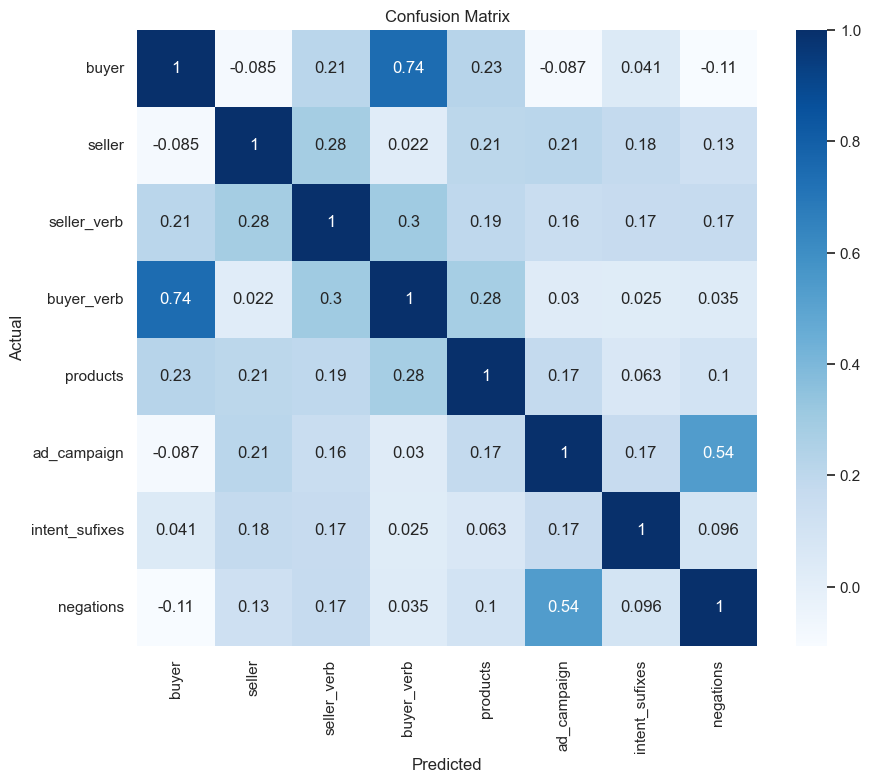

In [3]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)  # Adjust font size for clarity
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [4]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load your dataset (replace 'data.csv' with your dataset file)
data = df

# Assuming 'X' contains your feature columns and 'y' contains your target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("---------------------------------------------")
print("Confusion Matrix:\n", confusion_mat)
print("---------------------------------------------")
print("Classification Report:\n", classification_rep)


Accuracy: 0.8275
---------------------------------------------
Confusion Matrix:
 [[81 12 11  1]
 [ 0 85  0 12]
 [ 5  7 80  4]
 [ 7  5  5 85]]
---------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           B       0.87      0.77      0.82       105
          BS       0.78      0.88      0.83        97
           N       0.83      0.83      0.83        96
           S       0.83      0.83      0.83       102

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



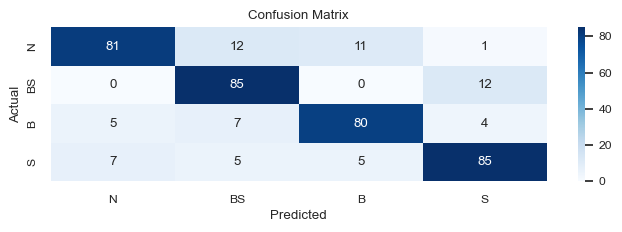

In [5]:
plt.figure(figsize=(8, 2))
sns.set(font_scale=.8)  # Adjust font size for clarity
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["N","BS","B","S"], yticklabels=["N","BS","B","S"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Initialize your Logistic Regression model
LRmodel = LogisticRegression()

k = 5

accuracy_scores = cross_val_score(LRmodel, X_train, y_train, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy*100:.2f}")

std_accuracy = np.std(accuracy_scores)
mean_accuracy = np.mean(accuracy_scores)*100

print(f"\nMean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")

LRmodel.fit(X_train, y_train)
test_accuracy = LRmodel.score(X_test, y_test)*100
print(f"\nTest Accuracy: {test_accuracy:.2f}")


Fold 1: Accuracy = 79.06
Fold 2: Accuracy = 84.69
Fold 3: Accuracy = 83.75
Fold 4: Accuracy = 84.69
Fold 5: Accuracy = 84.33

Mean Accuracy: 83.30
Standard Deviation of Accuracy: 0.02

Test Accuracy: 82.75


Enabling User Testing here: 

In [7]:
def predict_intent(testcase):
    import re # regular expression for pattern detection
    import openpyxl as op # For using tabular data.

    # Importing Buyers and Sellers data for training
    wb=op.load_workbook(r"training_intent_samples.xlsx")
    ws=wb.active

    buyers= []
    buyer_verbs=[]
    products=[]
    sellers = []
    seller_verbs=[]
    ad_camp=[]
    negations=[]
    intent_suffixes=[]

    # Extracting buyers and seller lists of WORD BANK to predict the intents
    for row in ws.iter_rows():
        if row[0].value is not None:
            buyers.append(str(row[0].value))
        if row[1].value is not None:
            buyer_verbs.append(str(row[1].value))
        if row[2].value is not None:
            products.append(str(row[2].value))
        if row[3].value is not None:
            sellers.append(str(row[3].value))
        if row[4].value is not None:
            seller_verbs.append(str(row[4].value))
        if row[5].value is not None:
            ad_camp.append(str(row[5].value))
        if row[6].value is not None:
            negations.append(str(row[6].value))
        if row[7].value is not None:
            intent_suffixes.append(str(row[7].value))

    # Creating patterns for regular expression for buyer and seller intents
    buyer_pattern = r'\b(?:' + '|'.join(map(re.escape, buyers)) + r')\b'
    buyer_verbs_pattern = r'\b(?:' + '|'.join(map(re.escape, buyer_verbs)) + r')\b'
    products_pattern = r'\b(?:' + '|'.join(map(re.escape, products)) + r')'
    sellers_pattern = r'\b(?:' + '|'.join(map(re.escape, sellers)) + r')\b'
    seller_verbs_pattern = r'\b(?:' + '|'.join(map(re.escape, seller_verbs)) + r')\b'
    ad_camp_pattern = r'\b(?:' + '|'.join(map(re.escape, ad_camp)) + r')\b'
    negations_pattern = r'\b(?:' + '|'.join(map(re.escape, negations)) + r')\b' 
    intent_suffixes_pattern = r'\b(?:' + '|'.join(map(re.escape, intent_suffixes)) + r')' 

    wb.close()


    # Finding all occurrences using the re module for patterns
    text=testcase

    buyer_match = re.findall(buyer_pattern, text, flags=re.IGNORECASE)
    buyer_verbs_match = re.findall(buyer_verbs_pattern, text, flags=re.IGNORECASE)
    products_match = re.findall(products_pattern, text, flags=re.IGNORECASE)
    seller_match = re.findall(sellers_pattern, text, flags=re.IGNORECASE)
    seller_verbs_match = re.findall(seller_verbs_pattern, text, flags=re.IGNORECASE)
    ad_camp_match = re.findall(ad_camp_pattern, text, flags=re.IGNORECASE)
    negations_match = re.findall(negations_pattern, text, flags=re.IGNORECASE)
    intent_suffixes_match= re.findall(intent_suffixes_pattern, text, flags=re.IGNORECASE)


    B=len(buyer_match)
    S=len(seller_match)
    SV=len(seller_verbs_match)
    BV=len(buyer_verbs_match)
    P=len(products_match)
    Ad=len(ad_camp_match)
    IS=len(intent_suffixes_match)
    PN=len(negations_match)


    # prediction: 
    pred=model.predict(np.array([B,S,SV,BV,P,Ad,IS,PN]).reshape(1, -1))
    pred=str(pred[0])
    
    if pred=='BS': return "Buyer Seller Intent"
    elif pred=='B': return "Buyer Intent"
    elif pred=='S': return "Seller Intent"
    elif pred=='N': return "Nothing"



In [8]:
testcase=input("Enter Your Sentence to be tested here: ")
print(predict_intent(testcase).upper(),"\n")

NOTHING 



c:\Users\MAYANK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
